<a href="https://www.kaggle.com/code/elifnurylmaz/fish-classification-globalaihub?scriptVersionId=202833718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Required Libraries and Loading Dataset


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

## Preprocessing

In [2]:
label = []  
path = []  
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'  

for dir_name, subdirs, filenames in os.walk(fish_dir):  # Correctly unpacking three values
    for filename in filenames:  
        if os.path.splitext(filename)[-1] == '.png':  
            if dir_name.split()[-1] != 'GT':  
                label.append(os.path.split(dir_name)[-1])  
                path.append(os.path.join(dir_name, filename))  

data = pd.DataFrame(columns=['path', 'label'])  
data['path'] = path  
data['label'] = label

## Content of Dataset

In [3]:
data.head()

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [4]:
data.tail()

,path,label
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8999,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


## Converting Data to NumPy Array

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

In [6]:
X, y = load_images(data)

## Splitting

In [7]:
from sklearn.model_selection import train_test_split
# Splitting the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# shapes of data
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# reshape the data
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 3)).astype('float32') / 255
X_val = X_val.reshape((X_val.shape[0], 28 * 28 * 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 3)).astype('float32') / 255

Training set shape: (5760, 28, 28, 3), (5760,)
Validation set shape: (1440, 28, 28, 3), (1440,)
Test set shape: (1800, 28, 28, 3), (1800,)


## Label Encoding

In [8]:

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_val_encoded = label_encoder.transform(y_val)          
y_test_encoded = label_encoder.transform(y_test)        

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

## Creating Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(28 * 28 * 3,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))



# print the summary of the model 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,204,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,370,121 (5.23 MB)

 Trainable params: 1,370,121 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50,  # Eğitim için epoch sayısını artırdık
                    batch_size=32)


Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1146 - loss: 2.1930 - val_accuracy: 0.2146 - val_loss: 2.0791
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2032 - loss: 2.0422 - val_accuracy: 0.2347 - val_loss: 1.8472
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2504 - loss: 1.8912 - val_accuracy: 0.3778 - val_loss: 1.7347
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2963 - loss: 1.7763 - val_accuracy: 0.3882 - val_loss: 1.6176
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3653 - loss: 1.6581 - val_accuracy: 0.4222 - val_loss: 1.4838
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3952 - loss: 1.5601 - val_accuracy: 0.4681 - val_loss: 1.4990
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4182 - loss: 1.4904 - val_accuracy: 0.4778 - val_loss: 1.3321
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4610 - loss: 1.4232 - val_accu

## Model Testing

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.4315
Test accuracy: 0.8761110901832581


## Performanca Evaluation 

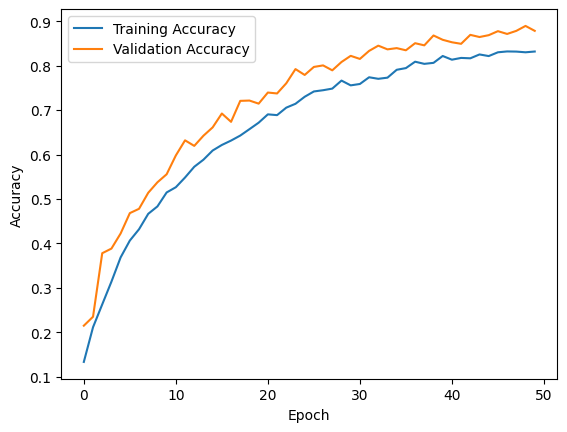

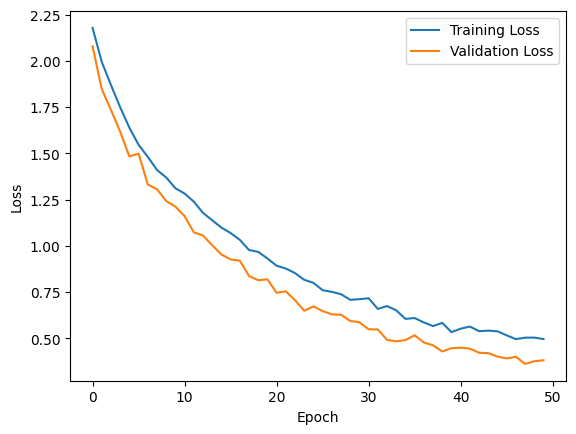

In [13]:


# Training Accuracy and Loss Graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
